<font color='orange'>**DSBDAL Ass. 2 - Data Wrangling II**</font><br/>
##### Create an “Academic performance” dataset of students and perform the following operations using Python.

#### **0. Creating the Dataset**

In [13]:
import pandas as pd
import numpy as np

acad_dict = {'Name':['Samruddhi','Shrushti','Siddhi','Chaitali','Sakshi'],
             'Maths':[100000,30,30,40,50],
             'Physics':[99,98,97,96,95],
             'Chemistry':[76,np.nan,74,75,73],
             'OOP':[87,89,90,91,93]}

df = pd.DataFrame(acad_dict)
df.head()

,Name,Maths,Physics,Chemistry,OOP
0,Samruddhi,100000,99,76.0,87
1,Shrushti,30,98,NaN,89
2,Siddhi,30,97,74.0,90
3,Chaitali,40,96,75.0,91
4,Sakshi,50,95,73.0,93


#### **1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.**

In [14]:
df.isna().sum()

Name         0
Maths        0
Physics      0
Chemistry    1
OOP          0
dtype: int64

In [15]:
df['Chemistry'].fillna(df['Chemistry'].mean())

0    76.0
1    74.5
2    74.0
3    75.0
4    73.0
Name: Chemistry, dtype: float64

#### **2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.**

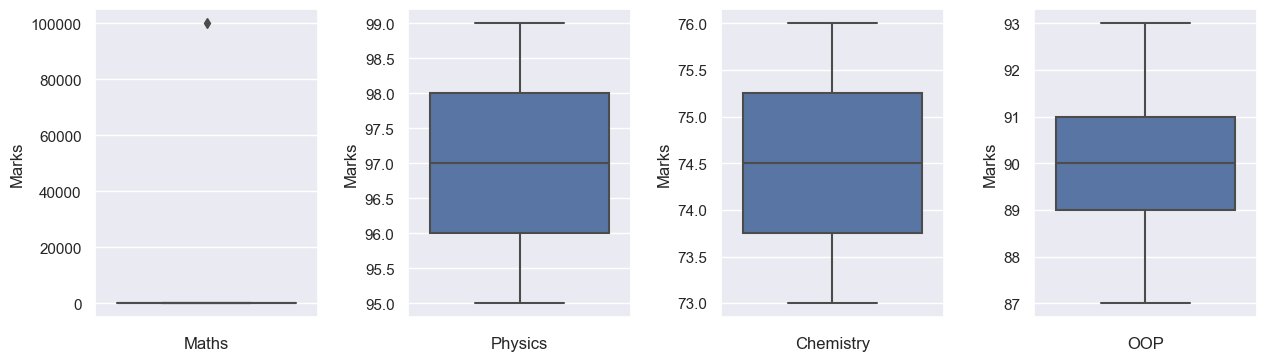

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,4, figsize=(15,4))
for i,col in enumerate(df.columns[1:]):
    sns.boxplot(ax=axes[i], y=df[col], data=df)
    axes[i].set_xlabel(col); axes[i].set_ylabel('Marks')
    
plt.subplots_adjust(wspace=0.4);

##### There is one outlier in the Maths Subject

In [17]:
df_sel = df['Maths']

In [18]:
q1, q3 = df_sel.quantile(0.25), df_sel.quantile(0.75)
iqr = q3-q1
lb, ub = (q1-1.5*iqr),(q3+1.5*iqr)
outliers = ((df_sel<q1) | (df_sel>q3))

In [19]:
outliers

0     True
1    False
2    False
3    False
4    False
Name: Maths, dtype: bool

##### Imputing the outliers using the median value

In [21]:
out_ind = df_sel[outliers].index
df_sel.mask(outliers, other=df_sel.median(), inplace=True)

In [22]:
df_sel

0    40
1    30
2    30
3    40
4    50
Name: Maths, dtype: int64

#### **3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.**

##### Let's assume that Maths marks are on the scale of 0-50 and Phy are on the scale of 0-100, hence we need to bring them on the same scale, for further operations. Hence, I'm using Standardization to obtain mean=0, deviation=1 for the df.

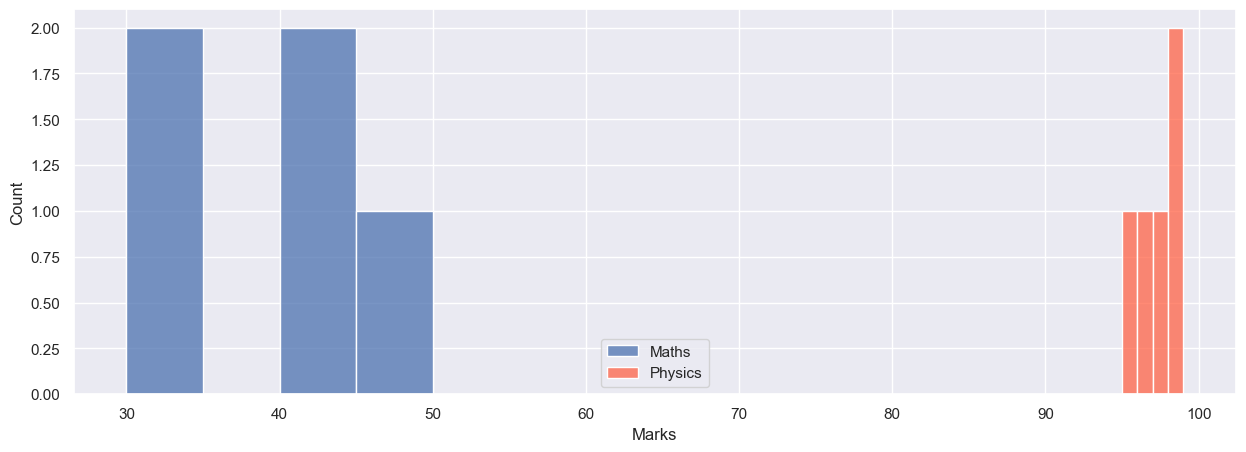

In [23]:
sns.set(rc={'figure.figsize':(15,5)})
sns.histplot(df['Maths'], label='Maths')
sns.histplot(df['Physics'], label='Physics', color='tomato')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Marks');

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df.iloc[:,1:])
df.iloc[:,1:] = sc.transform(df.iloc[:,1:])

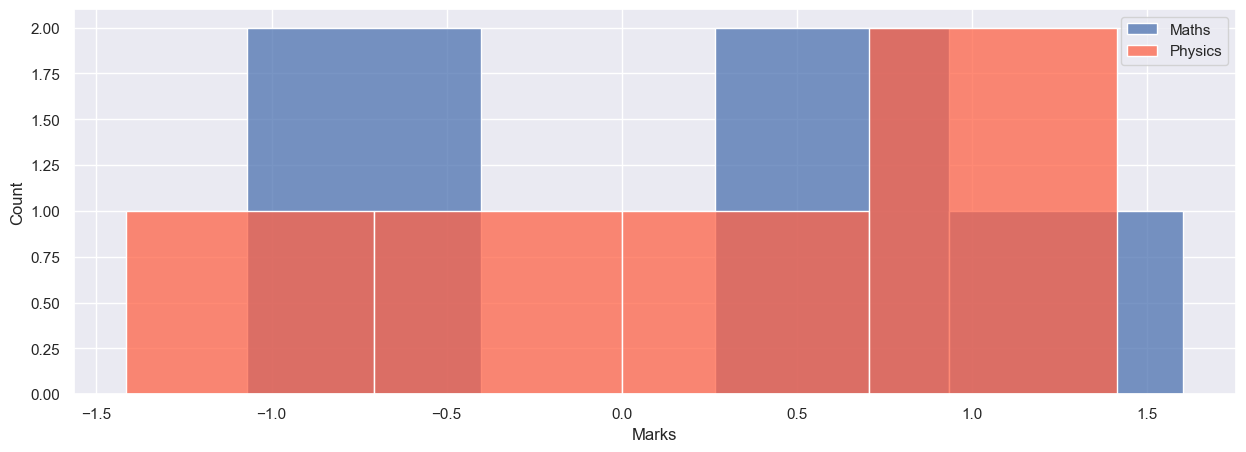

In [25]:
sns.histplot(df['Maths'], label='Maths');
sns.histplot(df['Physics'], label='Physics', color='tomato')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Marks');

#### Now, the marks are on the same scale i.e. they are comparable.